In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pathlib
import sys
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
sys.path.append(join(dir_path, "HelperFiles"))
from helper import *

In [2]:
with open(join(dir_path, "Experiments/Results/shap_fwers_K2"), "rb") as fp:
    shap_fwers2 = pickle.load(fp)
with open(join(dir_path, "Experiments/Results/shap_fwers_K5"), "rb") as fp:
    shap_fwers5 = pickle.load(fp)
rankshap_fwers = np.array([shap_fwers2, shap_fwers5])*100


with open(join(dir_path, "Experiments", "Results", "ss_ranks_k5_n500"), "rb") as fp:
    top_5_ss500 = np.array(pickle.load(fp))
N_pts = top_5_ss500.shape[0]
ss_fwers5a = [calc_fwer(top_5_ss500[i]) for i in range(N_pts)]
ss_fwers2a = [calc_fwer(top_5_ss500[i, :, :2]) for i in range(N_pts)]
ss_fwers_500 = np.array([ss_fwers2a, ss_fwers5a])*100


with open(join(dir_path, "Experiments", "Results", "ss_ranks_k2_n_adaptive"), "rb") as fp:
    top_2_ad = np.array(pickle.load(fp))
with open(join(dir_path, "Experiments", "Results", "ss_ranks_k5_n_adaptive"), "rb") as fp:
    top_5_ad = np.array(pickle.load(fp))
ss_fwers2b = [calc_fwer(top_2_ad[i]) for i in range(N_pts)]
ss_fwers5b = [calc_fwer(top_5_ad[i]) for i in range(N_pts)]
ss_fwers_ad = np.array([ss_fwers2b, ss_fwers5b])*100

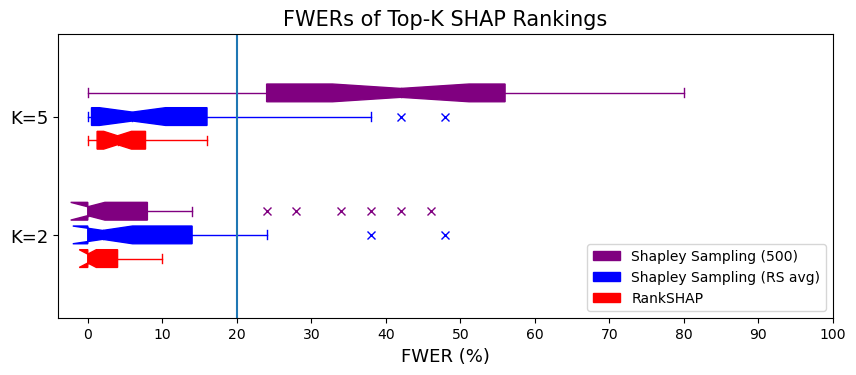

In [3]:
offset = 0.2
plt.figure(figsize=(10,4))

c = "purple"
plt.boxplot(ss_fwers_500.T, positions=[1+offset, 2+offset], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c, marker='x'),
            medianprops=dict(color=c), 
            vert=False
            )
c = "blue"
plt.boxplot(ss_fwers_ad.T, positions=[1, 2], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c, marker='x'),
            medianprops=dict(color=c), 
            vert=False
            )
c = "red"
plt.boxplot(rankshap_fwers.T, positions=[1-offset,2-offset], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c, marker='x'),
            medianprops=dict(color=c), 
            vert=False
            )

import matplotlib.patches as mpatches
colors = ["purple", "blue", "red"]
cols = ["Shapley Sampling (500)", "Shapley Sampling (RS avg)", "RankSHAP"]
patches = []
for i in range(3):
    patches.append(mpatches.Patch(color=colors[i], label=cols[i]))
plt.legend(handles=patches)

plt.yticks([1,2], ["K=2", "K=5"], size=13)
plt.xticks(np.linspace(0, 100, 11))
plt.axvline(20)
plt.xlabel("FWER (%)", size=13)
plt.subplots_adjust(bottom=0.17)
plt.title("FWERs of Top-K SHAP Rankings", size=15)
plt.savefig(join(dir_path, "Experiments", "Figures", "shap_boxplots.png"), bbox_inches="tight")
plt.show()
